In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM, Reshape, Dropout, LayerNormalization
from tensorflow.keras.models import Model, Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import concatenate
sc = MinMaxScaler(feature_range = (0,1))

import pandas as pd

In [2]:
df1 = pd.read_csv('AI_U16_ONU16_15S_Ri_0411.csv', usecols=[0], engine='python')
df1.head()

,Ri
0,472
1,906
2,472
3,906
4,472


In [3]:
df2 = pd.read_csv('AI_U16_ONU16_15S_Ai_0411.csv', usecols=[0], engine='python')
df2.head()

,Ai
0,472
1,906
2,472
3,906
4,472


In [4]:
df1 = df1.values
df1 = df1.astype('float32')

df2 = df2.values
df2 = df2.astype('float32')

In [5]:
#df2 = []

#for i in range(len(df)):
#    if(df[i] > 195000.0):
#        df[i] = 195000.0
#    df2.append(df[i])

In [6]:
#df = df2
df1 = df1[:1000]
df2 = df2[:1000]
print(len(df1))
print(len(df2))

1000
1000


In [7]:
# normalize the dataset
#scaler = MinMaxScaler(feature_range=(0, 1))
#datasetG = scaler.fit_transform(df1)
#datasetA = scaler.fit_transform(df2)
datasetG = df1
datasetA = df2

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [9]:
# split into train and test sets
train_sizeG = int(len(datasetG) * 0.7) 
test_sizeG = len(datasetG) - train_sizeG
trainG, testG = datasetG[0:train_sizeG], datasetG[train_sizeG:len(datasetG)]

trainG = scaler.fit_transform(trainG)
testG = scaler.fit_transform(testG)
print(len(trainG), len(testG))

700 300


In [10]:
# split into train and test sets
train_sizeA = int(len(datasetA) * 0.7) 
test_sizeA = len(datasetA) - train_sizeA
trainA, testA = datasetA[0:train_sizeA], datasetA[train_sizeA:len(datasetA)]

scaler = MinMaxScaler(feature_range=(0, 1))
trainA = scaler.fit_transform(trainA)
testA = scaler.fit_transform(testA)
print(len(trainA), len(testA))

700 300


In [11]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [12]:
# reshape into X=t and Y=t+1
look_back = 5 #16
trainX_G, trainY_G = create_dataset(trainG, look_back)
testX_G, testY_G = create_dataset(testG, look_back)

trainX_A, trainY_A = create_dataset(trainA, look_back)
testX_A, testY_A = create_dataset(testA, look_back)

In [13]:
# reshape input to be [samples, time steps, features]
trainX_G = np.reshape(trainX_G, (trainX_G.shape[0], look_back, 1))
testX_G = np.reshape(testX_G, (testX_G.shape[0], look_back, 1))

trainX_A = np.reshape(trainX_A, (trainX_A.shape[0], look_back, 1))
testX_A = np.reshape(testX_A, (testX_A.shape[0], look_back, 1))
#print(trainX.shape[1])
print(trainX_G.shape)
print(trainY_G.shape)
print(testX_G.shape)
print(testY_G.shape)

print(trainX_A.shape)
print(trainY_A.shape)
print(testX_A.shape)
print(testY_A.shape)

(694, 5, 1)
(694, 1)
(294, 5, 1)
(294, 1)
(694, 5, 1)
(694, 1)
(294, 5, 1)
(294, 1)


In [ ]:
#inputsR = Input(shape=(timesteps,))
#inputs_A = Input(shape=(look_back,))
inputs_G = Input(shape=(look_back,))
#inputs = LayerNormalization(axis=1)(inputs)
#inputs_R_test = Reshape((inputs_R.shape[1],1))(inputs_R)
#inputs_A_test = Reshape((inputs_A.shape[1], 1))(inputs_A)
inputs_G_test = Reshape((inputs_G.shape[1], 1))(inputs_G)

#input_merge = concatenate([inputs_A_test,inputs_G_test], axis = -1)

tgt1 = Reshape((look_back, 1))(inputs_G_test)

#tf.print(tgt1, output_stream=sys.stderr)

In [14]:
#tgt1 = LSTM(units=40, input_shape=(look_back, 2))(tgt1)
#predictions = Dense(1, activation='relu')(tgt1)
inputs_G = Input(shape=(look_back,))
#inputs = LayerNormalization(axis=1)(inputs)
tgt1 = tf.keras.layers.Reshape((look_back,1),input_shape=(look_back,))(inputs_G)

tgt1 = LSTM(units=40, return_sequences = True, input_shape=(look_back, 1))(tgt1)
tgt1 = Dropout(0.2)(tgt1)

tgt2 = LSTM(units=40, return_sequences = True)(tgt1)
tgt2 = Dropout(0.2)(tgt2)

tgt3 = LSTM(units=40, return_sequences = True)(tgt2)
tgt3 = Dropout(0.2)(tgt3)

#tgt4 = LSTM(units=40, return_sequences = True)(tgt3)
#tgt4 = Dropout(0.2)(tgt4)

#tgt5 = LSTM(units=40, return_sequences = True)(tgt4)
#tgt5 = Dropout(0.2)(tgt5)

#tgt6 = LSTM(units=20)(tgt5)
#tgt6 = Dropout(0.2)(tgt6)

#tgt7 = LSTM(units=20, return_sequences = True)(tgt6)
#tgt7 = Dropout(0.2)(tgt7)

#tgt8 = LSTM(units=20, return_sequences = True)(tgt7)
#tgt8 = Dropout(0.2)(tgt8)

#tgt9 = LSTM(units=20, return_sequences = True)(tgt8)
#tgt9 = Dropout(0.2)(tgt9)

tgt4 = LSTM(units=40)(tgt3)
tgt4 = Dropout(0.2)(tgt4)

#tgt6 = LSTM(units=40, return_sequences = True)(tgt5)

#tgt7 = LSTM(units=40)(tgt6)


#tgt5 = Flatten()(tgt5)
#predictions = Dense(1, activation='relu')(tgt4)
predictions = Dense(1)(tgt4)


model = Model(inputs= inputs_G, outputs=predictions)
model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mse','mae'])

history = model.fit(trainX_G, trainY_G, epochs=100, batch_size=32) #[1,0,0], [0,0,1]

Epoch 1/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0321
Epoch 2/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0314
Epoch 3/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0313
Epoch 4/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0327
Epoch 5/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0317
Epoch 6/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0045 - mse: 0.0045 - mae: 0.0314
Epoch 7/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0311
Epoch 8/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0313
Epoch 9/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0311  
Epoch 10/100
22/22 [======

22/22 [==============================] - 0s 5ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0288
Epoch 76/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0282
Epoch 77/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0282
Epoch 78/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0275  
Epoch 79/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0277
Epoch 80/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0295  
Epoch 81/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0296
Epoch 82/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0285
Epoch 83/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0274
Epoch 84/100
22/22 [========

look back = timesteps = 10, 4 LSTM layers

timesteps :  5


Text(0.5, 1.0, 'mae')

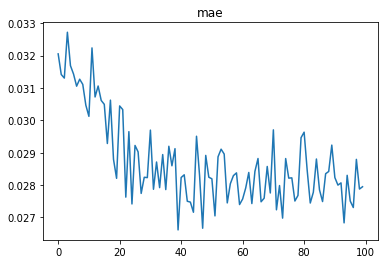

In [15]:
print('timesteps : ', look_back)
plt.plot(history.history['mae'])
plt.title('mae')

timesteps :  5


Text(0.5, 1.0, 'mse')

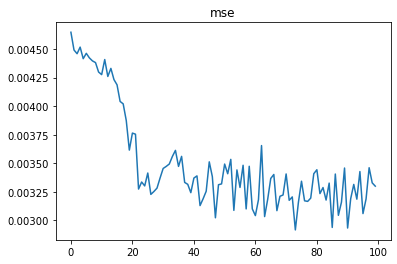

In [16]:
print('timesteps : ', look_back)
plt.plot(history.history['mse'])
plt.title('mse')

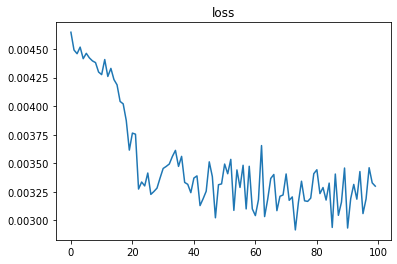

In [17]:
plt.title('loss')
plt.plot(history.history['loss'])

In [18]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
reshape (Reshape)            (None, 5, 1)              0         
_________________________________________________________________
lstm (LSTM)                  (None, 5, 40)             6720      
_________________________________________________________________
dropout (Dropout)            (None, 5, 40)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 40)             12960     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 40)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 40)            

In [19]:
from sklearn.metrics import mean_squared_error as mse

trainPredict = model.predict(trainX_A, batch_size = 32)
testPredict = model.predict(testX_A, batch_size = 32)

In [20]:
# invert predictions
#scaler = MinMaxScaler(feature_range=(0, 1))
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY_A)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY_A)
# calculate root mean squared error
trainScore = math.sqrt(mse(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mse(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
# calculate root mean absolute error
trainScore2 = math.sqrt(mae(trainY, trainPredict))
print('Train Score: %.2f RMAE' % (trainScore2))
testScore2 = math.sqrt(mae(testY, testPredict))
print('Test Score: %.2f RMAE' % (testScore2))

Train Score: 17661.68 RMSE
Test Score: 26050.16 RMSE
Train Score: 94.85 RMAE
Test Score: 105.04 RMAE


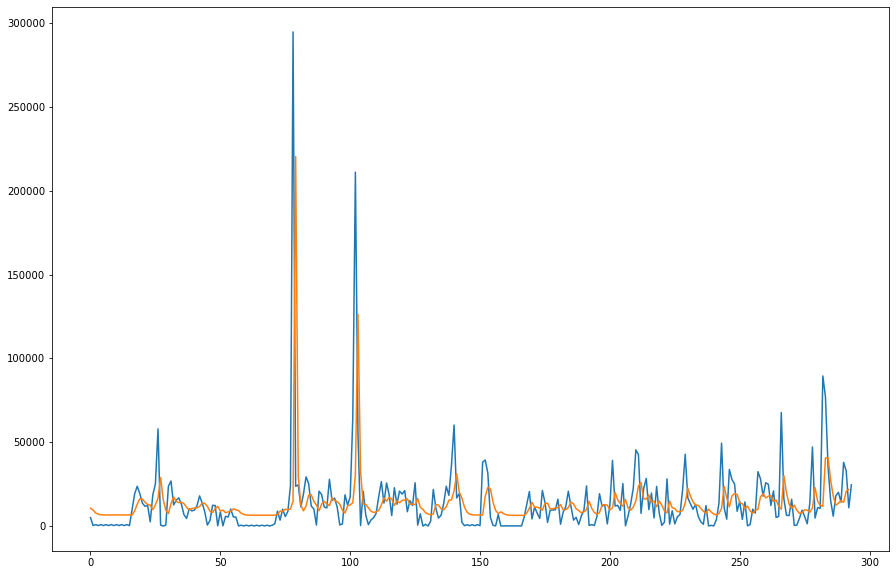

In [21]:
testPredictPlot = np.empty_like(datasetA)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(datasetA)-1] = testPredict
# plot baseline and predictions
plt.figure(figsize=(15, 10))
#plt.plot(datasetA[1500:])
plt.plot(datasetA[706:])
#plt.plot(trainPredictPlot)
plt.plot(testPredictPlot[706:])
plt.show()

In [22]:
max(testPredict)

array([220373.47], dtype=float32)

In [ ]:
#testPredict

In [ ]:
#testY_A

In [ ]:
#datasetA[:100]

In [ ]:
model.save('U16D00_ONU16_AiGi-1_1401388_195000_4layer_lookback.h5', include_optimizer=False)